# Momento de Retroalimentación
### Módulo 1. Técnicas de procesamiento de datos para el análisis estadístico y para la construcción de modelos (Portafolio Análisis)
#### María Fernanda Torres Alcubilla A01285041


# Primera entrega

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Exploración de base de datos

In [2]:
# Lectura de base de datos
df = pd.read_csv('precios_autos.csv')

# De acuerdo a la documentación, la variable symboling es categórica
df.symboling = df.symboling.astype('object')

In [ ]:
df.head()

,symboling,CarName,fueltype,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginetype,cylindernumber,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,...,dohc,four,130,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,...,dohc,four,130,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,ohcv,six,152,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,sedan,fwd,front,99.8,176.6,66.2,54.3,...,ohc,four,109,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,sedan,4wd,front,99.4,176.6,66.4,54.3,...,ohc,five,136,3.40,8.0,115,5500,18,22,17450.0


### Medidas estadísticas

#### **Variables cuantitativas**

En el conteo podemos observar que ninguna característica tiene valores nulos. Las variables *curbweight, enginesize, peakrpm* y *price* presentan un gran rango entre el máximo y mínimo y una gran variabilidad.

In [ ]:
df.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#### **Variables cualitativas**

##### ***Moda y otras medidas***

La característica *count* muestra el conteo de los registros de cada columna, podemos observar que ninguna presenta datos nulos.

En *unique* se observan los valores únicos, en los cuales CarName es el que más presenta debido a la diversidad en el mercado. Seguido, en *top* y *frec* se muestra el valor de la moda y su frecuencia, respectivamente. Donde los mayores conteos corresponden a alguna característica técnica/mecánica del automovil como *enginelocation* o *fueltype*

In [ ]:
df.describe(include = 'object')

,symboling,CarName,fueltype,carbody,drivewheel,enginelocation,enginetype,cylindernumber
count,205,205,205,205,205,205,205,205
unique,6,147,2,5,3,2,7,7
top,0,toyota corona,gas,sedan,fwd,front,ohc,four
freq,67,6,185,96,120,202,148,159


##### ***Frecuencias***

Se excluyó *CarName* ya que cuenta con varios valores que no se visualizan bien en este apartado, posteriormente se tomará en cuenta

Podemos observar que los carros con una tasa de riesgo neutra son los que tiene mayor frecuencia.

In [ ]:
df.symboling.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

Podemos observar un claro desbalance entre el tipo de combustible de los automóviles.

In [ ]:
df.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

El sedan es la forma de auto más popular.

In [ ]:
df.carbody.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

El front-wheel drive (fwd) es el más popular, seguido de rear-wheel drive (rwd) y por último 4-wheel drive (4wd)

In [ ]:
df.drivewheel.value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

En este caso es muy común que el motor esté al frente, con solo 3 casos en la parte trasera.

In [ ]:
df.enginelocation.value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

El overhead camshaft engine (OHC) es el más popular, seguidos de sus similares (OHCF y OHCV)

In [ ]:
df.enginetype.value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

Por último, podemos observar que la mayoría de los registros son de 4 cilindros.

In [ ]:
df.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

### Visualización variables cuantitativas

#### ***Medidas de posición***
En el primer apartado se juntaron en parejas de variables debido a su similitud de rangos, en la segunda se graficaron las variables restantes individualmente.

Podemos observar que las variables *carwidth* y *enginesize* son las que cuentan con mayores datos atípicos.

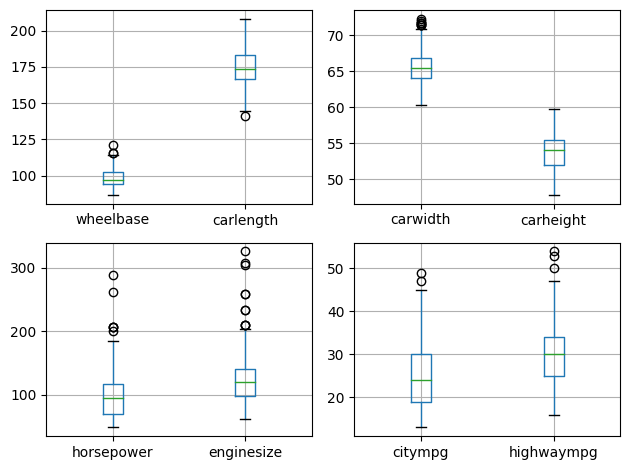

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)

df[['wheelbase','carlength']].boxplot(ax=axes[0,0])
df[['carwidth','carheight']].boxplot(ax=axes[0,1])
df[['horsepower','enginesize']].boxplot(ax=axes[1,0])
df[['citympg','highwaympg']].boxplot(ax=axes[1,1])
fig.tight_layout()

Podemos observar que a diferencia de las 2 variables mencionadas anteriormente, la variable *compressionratio* además de tener valores atípicos, estos están muy alejados de la caja, los cuales podrían ser valores extremos.
Además, la variable objetivo *price* también cuenta con valores atípicos.

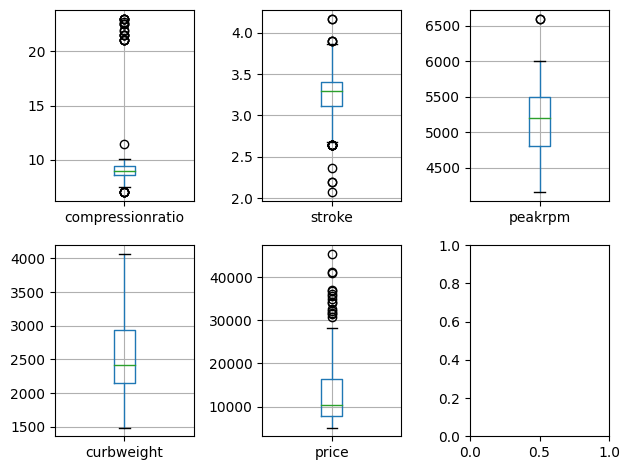

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3)
df[['compressionratio']].boxplot(ax=axes[0,0])
df[['stroke']].boxplot(ax=axes[0,1])
df[['peakrpm']].boxplot(ax=axes[0,2])
df[['curbweight']].boxplot(ax=axes[1,0])
df[['price']].boxplot(ax=axes[1,1])
fig.tight_layout()

#### ***Análisis de distribución de los datos***

Todas las variables cuentan con forma asimétrica, sin embargo, a simple vista unas cuentan con un sesgo positivo o negativo, unas más notorias que otras.

Las variables con sesgo positivo son *carheight, Stroke* y menos notorio, *Peakrpm*

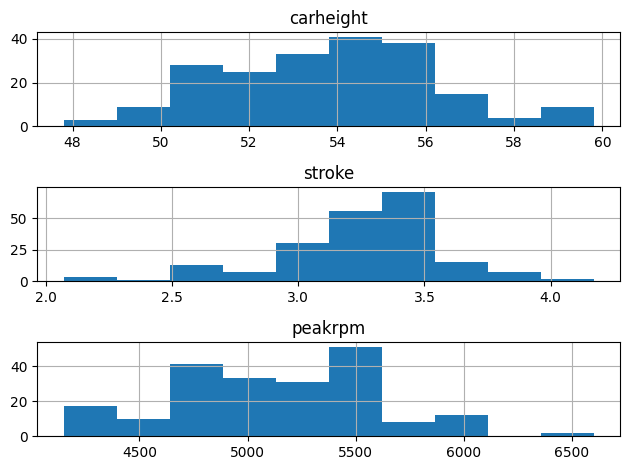

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1)
df[['carheight']].hist(ax=axes[0])
df[['stroke']].hist(ax=axes[1])
df[['peakrpm']].hist(ax=axes[2])

fig.tight_layout()

Las variables con sesgo negativo son la mayoría, las cuales son las siguientes:

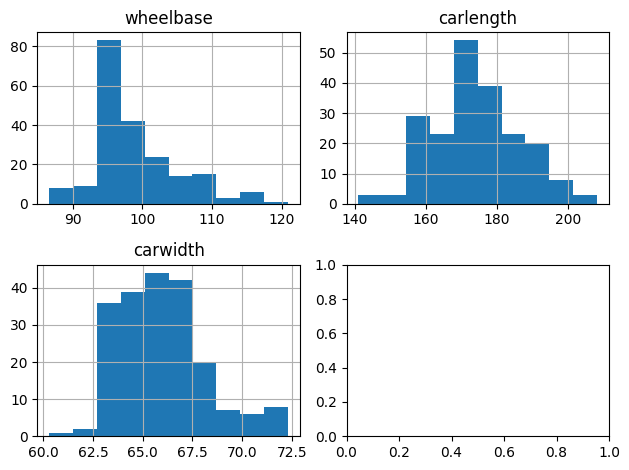

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
df[['wheelbase']].hist(ax=axes[0,0])
df[['carlength']].hist(ax=axes[0,1])
df[['carwidth']].hist(ax=axes[1,0])
fig.tight_layout()

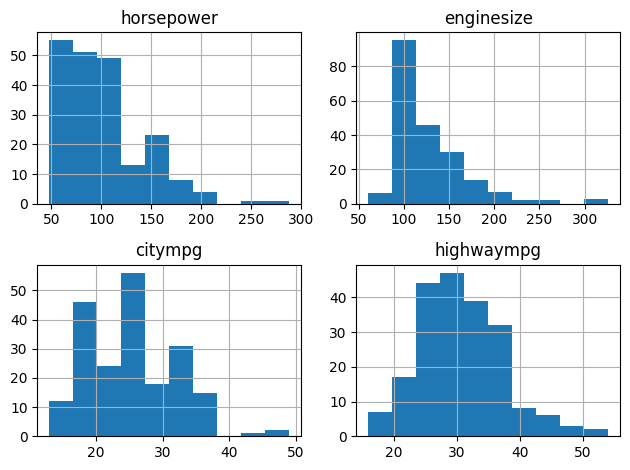

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
df[['horsepower']].hist(ax=axes[0,0])
df[['enginesize']].hist(ax=axes[0,1])
df[['citympg']].hist(ax=axes[1,0])
df[['highwaympg']].hist(ax=axes[1,1])
fig.tight_layout()

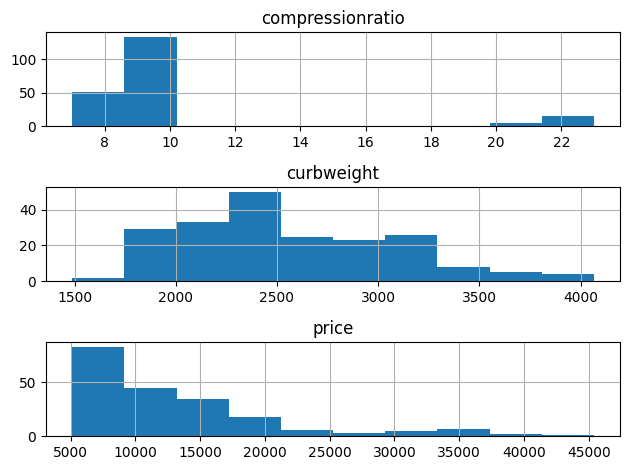

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1)
df[['compressionratio']].hist(ax=axes[0])
df[['curbweight']].hist(ax=axes[1])
df[['price']].hist(ax=axes[2])
fig.tight_layout()

#### ***Colinealidad***

##### ***Correlación***

Las variables con una correlación mayor a +- 0.9 es solamente *cutympg* con *highwaympg*.

Hablando de *price* las variables que más correlación tienen con esta (>= + 0.84) son *curbweight* y *enginesize*.

<ipython-input-19-41447a73f7a4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr =  df.corr()


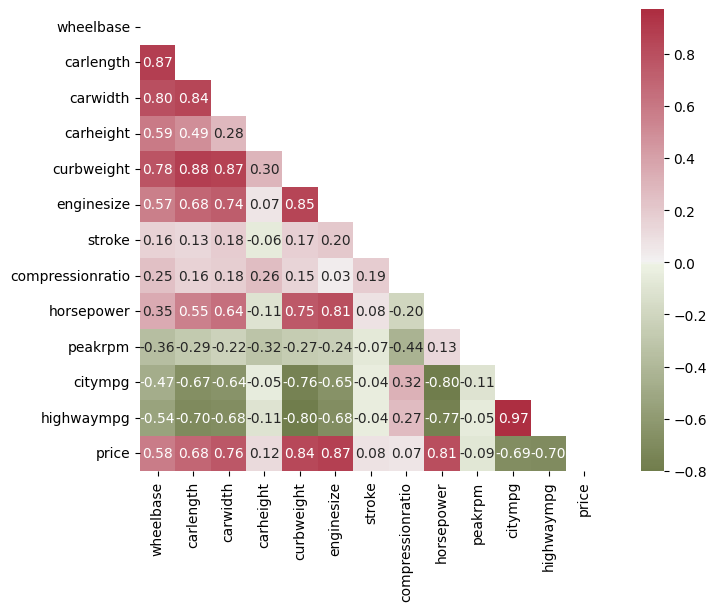

In [ ]:
corr =  df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)
plt.show();

##### ***Gráficas de dipsersión***

En esta matriz podemos observar en la diagonal la distribución de las variables en forma de linea y en el resto del cuadrante el comportamiento correspondiente a las variables *x* y *y*. En este se puede observar de mejor manera la correlación que se describe en el apartado anterior.

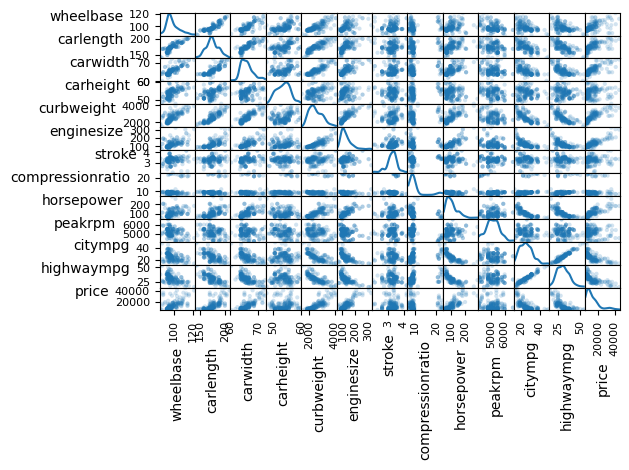

In [ ]:
axes = pd.plotting.scatter_matrix(df.select_dtypes(include='number'), diagonal='kde', alpha = 0.2);
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

### Visualización variables categóricas

#### Distribución de los datos

##### ***Diagramas de barras***

En el caso de la variable *CarName* solo se muestran los primeros 10 valores con más frecuencia ya que se tienen 147 modelos diferentes.

En estas gráficas se pueden observar de mejor manera las frecuencias obtenidas en las medidas estadísticas, donde se ve el desbalance en ciertas variables hacia cierto valor de la característica.

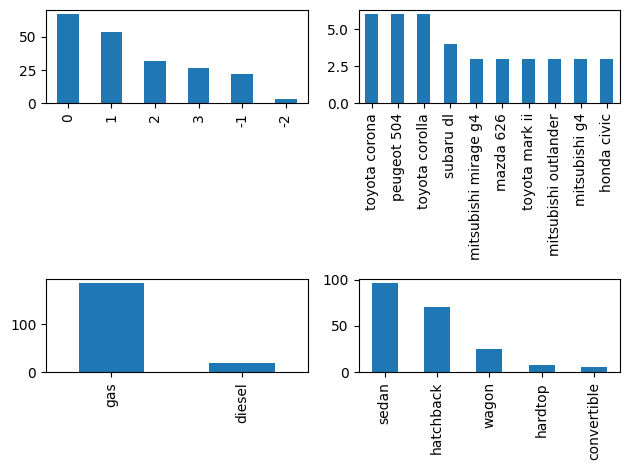

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
df['symboling'].value_counts().sort_values(ascending = False).plot.bar(ax=axes[0,0])
df['CarName'].value_counts().sort_values(ascending = False)[0:10].plot.bar(ax=axes[0,1])
df['fueltype'].value_counts().sort_values(ascending = False).plot.bar(ax=axes[1,0])
df['carbody'].value_counts().sort_values(ascending = False).plot.bar(ax=axes[1,1])

fig.tight_layout()

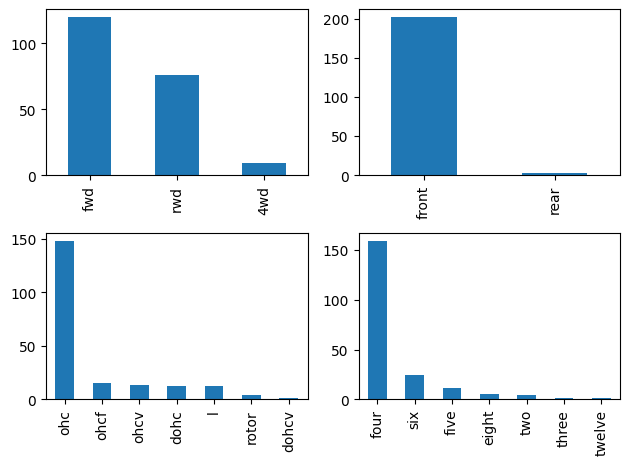

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
df['drivewheel'].value_counts().sort_values(ascending = False).plot.bar(ax=axes[0,0])
df['enginelocation'].value_counts().sort_values(ascending = False).plot.bar(ax=axes[0,1])
df['enginetype'].value_counts().sort_values(ascending = False).plot.bar(ax=axes[1,0])
df['cylindernumber'].value_counts().sort_values(ascending = False).plot.bar(ax=axes[1,1])

fig.tight_layout()

##### ***Diagramas de pastel***

En la variable *CarName* solamente se grafican los primeros 10 modelos con más frecuencia.

Aquí de igual manera se pueden observar los desbalances y frecuencias de los valores de cada categoría.

In [ ]:
def pie(df, col):
  fig = make_subplots(rows=2, cols=1, specs=[[{'type':'domain'}], [{'type':'domain'}]])

  fig.add_trace(go.Pie(labels=df[col[0]].value_counts().index, values=df[col[0]].value_counts().values, name=col[0], legendgroup = '1'), 1,1)
  fig.add_trace(go.Pie(labels=df[col[1]].value_counts().index, values=df[col[1]].value_counts().values, name=col[1], legendgroup = '2'), 2,1)

  fig.update_layout(
      legend_tracegroupgap = 90,
  )

  fig.show()

In [ ]:
#go.Pie(names = , name="GHG Emissions")
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows=2, cols=1, specs=[[{'type':'domain'}], [{'type':'domain'}]])

fig.add_trace(go.Pie(labels=df.symboling.value_counts().index, values=df.symboling.value_counts().values, name="Symboling", legendgroup = '1'), 1,1)
fig.add_trace(go.Pie(labels=df.CarName.value_counts().index[0:10], values=df.CarName.value_counts().values[0:10], name="Car Name", legendgroup = '2'), 2,1)

fig.update_layout(
    legend_tracegroupgap = 90,
)

fig.show()


In [ ]:
pie(df, ['fueltype', 'carbody'])

In [ ]:
pie(df, ['drivewheel', 'enginelocation'])

In [ ]:
pie(df, ['enginetype', 'cylindernumber'])

#### Colinealidad

***Boxplots de precio por categoría***

Se excluyó la variable de *CarName* debido a su diversidad, ya que al tener tantos valores y pocos de cada uno, la colinealidad con el precio no se puede definir.

Podemos observar que la mayoría de las variables no presentan una gran separación en *price*. Por ejemplo, los valores de *enginetype* se intersectan en los mismos rangos de precio, por lo que al querer hacer una predicción esta variable no podrá describir o realizar una separación y causará ruido al modelo.

Por otro lado, las variables que cuentan con una mejor separación son *drivewheel* y *cylindernumber*

In [ ]:
def box_price(df, col):
  d = {}
  for i in df[col].unique():
    d[i] = df[df[col] == i]['price'].values

  labels, data = [*zip(*d.items())]
  labels, data = d.keys(), d.values()
  plt.boxplot(data)
  plt.title('Precio por categoría de ' + col)
  plt.xticks(range(1, len(labels) + 1), labels)
  plt.xlabel(col)
  plt.ylabel('Precio')
  plt.show()

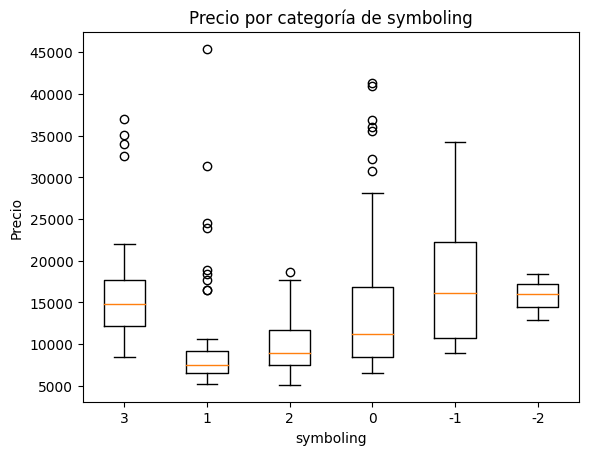

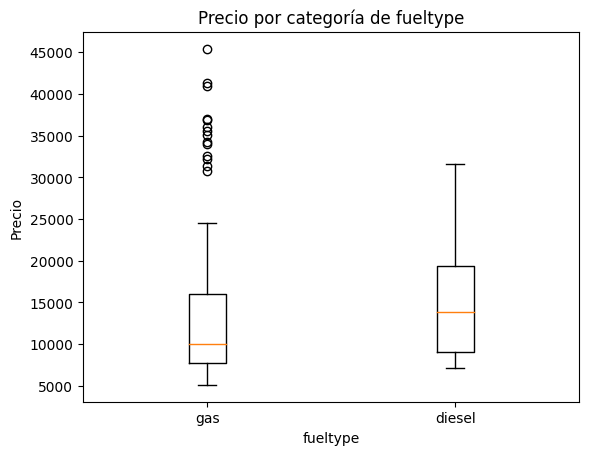

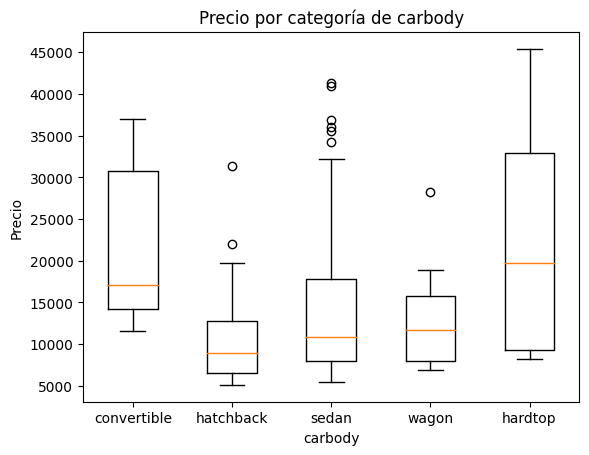

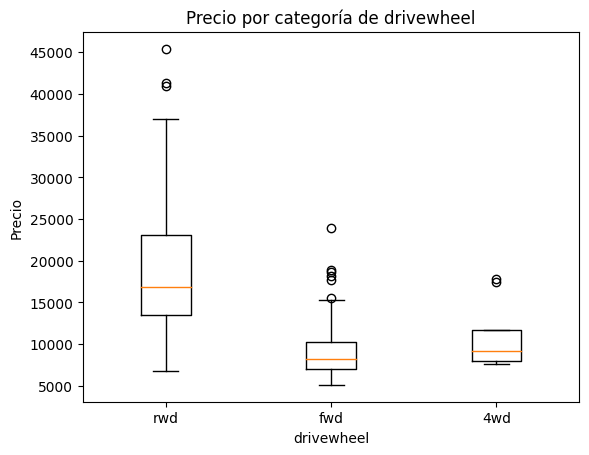

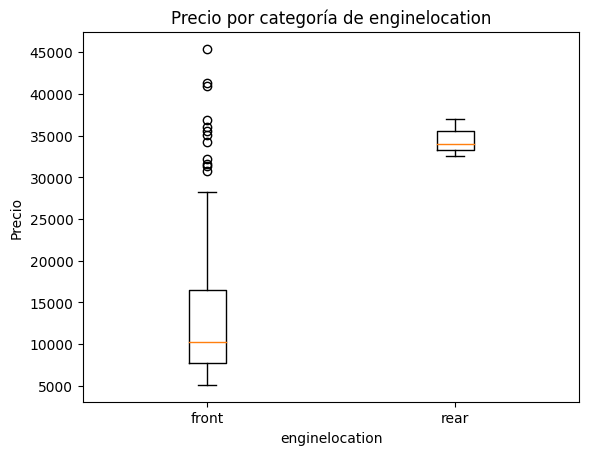

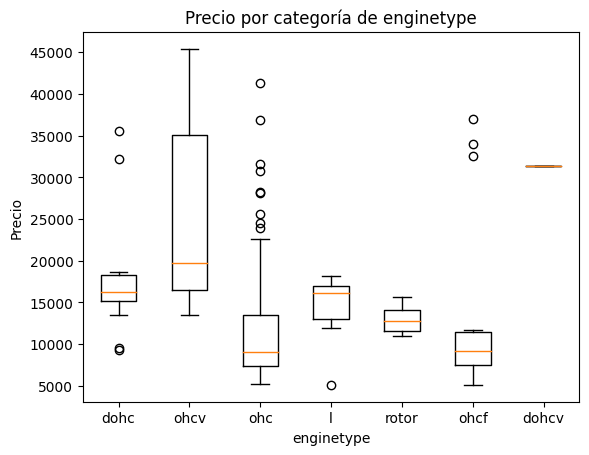

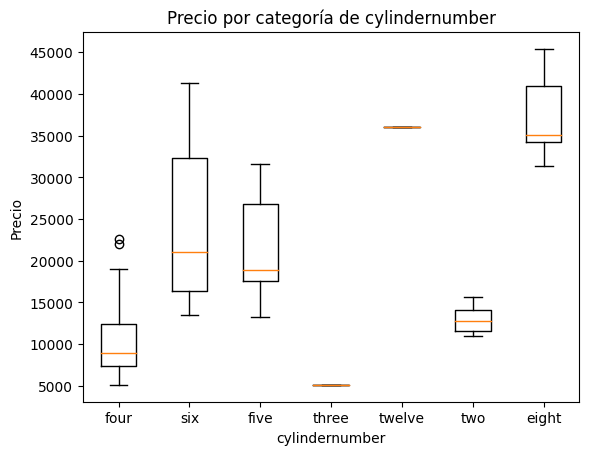

In [ ]:
for i in df.select_dtypes('object').drop('CarName', axis = 1).columns:
  box_price(df, i)

### Calidad de datos

Valores faltantes. podemos observar que en ninguna variable se presentan datos faltantes, como se mencionaba en la Exploración de datos.

In [ ]:
df.isna().sum()

symboling           0
CarName             0
fueltype            0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Respecto a los outliers, en el apartado de visualización de medidas de posición se pueden observar los boxplots de las variables cuantitativas, las variables que muestran grandes cantidades de estos o muy alejados de la caja son: *Horsepower, Enginesize, Compressionratio* y *Price*, especialmente las últimas dos.
El proceso de decisión de selección de variables y tratamiento será considerando dicho comportamiento.

### Selección de variables

Primero, las variables numéricas a considerar se establecerán a través de la correlación, estas con sus valores son:
- 0.87 Enginesize
- 0.84 curbweight
- 0.81 horsepower
- 0.76 carwidth
- 0.70 highwaympg
- 0.68 carlength
- -0.69 citympg

Para evitar que una variable a considerar se pueda describir por medio de otra de este mismo apartado se observa la correlación entre ellas en la siguiente matriz. Por ejemplo, podemos observar que las variables *Citympg* y *Highwaympg* tienen una correlación muy alta (0.97), por lo que solo se tendría que seleccionar una de estas dos variables (en este caso *Highwaympg* por tener correlación mayor con *Price*).

Otras variables que se relacionan con un coeficiente de 0.88 es *Carlength* y *Curbweight* (escogiendo la última por su mayor correlación con *Price*)

Por último, con una correlación de 0.87 las variables *Carwidth* y *Curbweight* se relacionan, escogiendo nuevamente esta última debido a su mayor correlación con *Price*

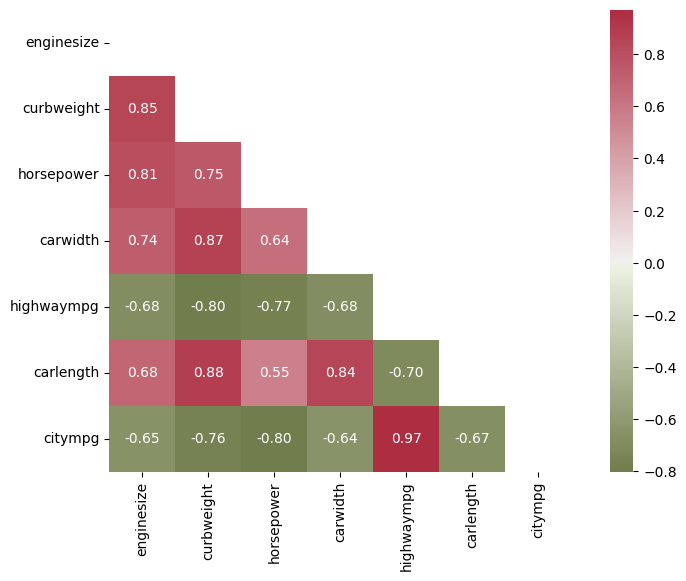

In [5]:
d1 = df[['enginesize','curbweight','horsepower','carwidth','highwaympg','carlength','citympg']]
corr = d1.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)
plt.show();

En cuanto las variables categóricas, estas se escogerán respecto al comportamiento del precio por categoría descritos en la parte de Exploración de datos. Las variables que sus categorías separan de mejor manera el precio por rangos son *cylindernumber* y *drivewheel.*

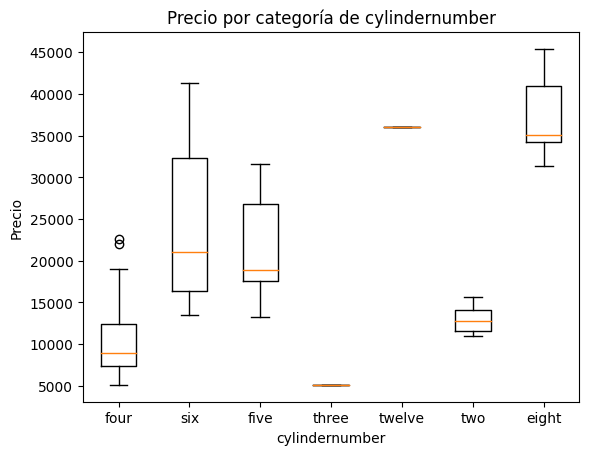

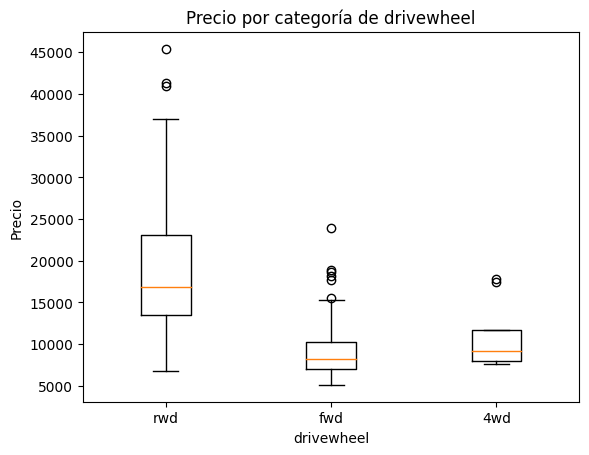

In [ ]:
box_price(df, 'cylindernumber')
box_price(df, 'drivewheel')

Por lo que, las 6 variables a seleccionar para describir *Price* son 4 numéricas y 2 categóricas:
- enginesize (numérica)
- curbweight (numérica)
- horsepower (numérica)
- highwaympg (numérica)
- cylindernumber (categórica)
- drivewheel (categórica)

In [3]:
data = df[['enginesize','curbweight','horsepower','highwaympg','cylindernumber','drivewheel']]

## Preparación de la base de datos

### Manejo datos categóricos

Solo se tienen dos variables categóricas, con la variable *cylindernumber* se decidirá cambiar sus valores, por ejemplo el valor 'four' se cambiará al número 4, esto debido a que el cambio en el valor si representa un incremento en el contexto del problema. En cuanto a la variable *drivewheel* no presenta alguna jerarquía, así que se decide dejarlo con las etiquetas originales.

In [4]:
data['cylindernumber'].replace(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
 [4, 6, 5, 3, 12, 2, 8], inplace = True)

<ipython-input-4-161c158645e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cylindernumber'].replace(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],


In [31]:
data.head()

,enginesize,curbweight,horsepower,highwaympg,cylindernumber,drivewheel
0,130,2548,111,27,4,rwd
1,130,2548,111,27,4,rwd
2,152,2823,154,26,6,rwd
3,109,2337,102,30,4,fwd
4,136,2824,115,22,5,4wd


In [ ]:
data.dtypes

enginesize         int64
curbweight         int64
horsepower         int64
highwaympg         int64
cylindernumber     int64
drivewheel        object
dtype: object

### Datos atípicos

Observamos que la variable que cuenta con más outliers es *enginesize* aunque no en gran cantidad o tan lejanos, por lo que se decide dejarlos, aunque en dado caso de ver un problema en nuestro modelo, se reconsiderará su eliminación.  

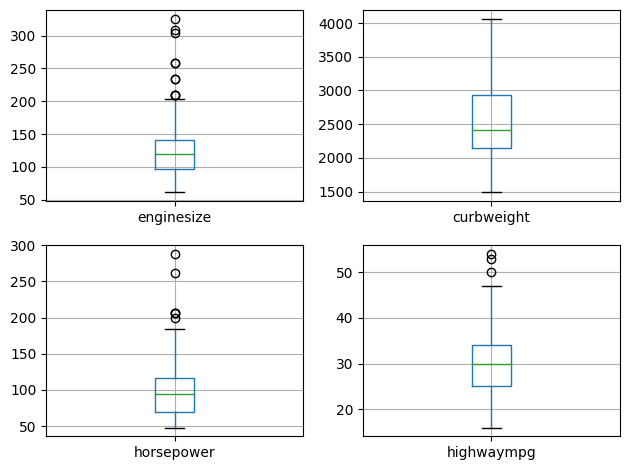

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)

data[['enginesize']].boxplot(ax=axes[0,0])
data[['curbweight']].boxplot(ax=axes[0,1])
data[['horsepower']].boxplot(ax=axes[1,0])
data[['highwaympg']].boxplot(ax=axes[1,1])

fig.tight_layout()

### Transformación de datos

Como pudimos observar en la sección anterior, las variables *enginesize* y *horsepower* tienen una escala similar, sin embargo, las variables *curbweight*, *highwaympg* y *cylindernumber* tienen escalas completamentes diferentes (muy altas y muy pequeñas), todas escalas discretas. Además, en los histogramas no se observaba un comportamiento normal.

Por lo que será necesario la transformación de datos a través de la normalización, a través de la transformación Yeo-Johnson, con una media cercana a 0 y varianza a 1.

In [5]:
from sklearn.preprocessing import PowerTransformer
num = data.drop('drivewheel', axis = 1)
power = PowerTransformer(method = 'yeo-johnson', standardize = True)
d_c = power.fit_transform(num)

In [6]:
# Base de datos final normalizada
d_transf = pd.DataFrame(d_c, columns = num.columns)
d_transf['price'] = df.price
d_transf['drivewheel'] = df.drivewheel
d_transf.head()

,enginesize,curbweight,horsepower,highwaympg,cylindernumber,price,drivewheel
0,0.380332,0.144823,0.466122,-0.487338,-0.284007,13495.0,rwd
1,0.380332,0.144823,0.466122,-0.487338,-0.284007,16500.0,rwd
2,0.890484,0.647098,1.286257,-0.652500,1.575792,16500.0,rwd
3,-0.294503,-0.303501,0.226519,-0.020113,-0.284007,13950.0,fwd
4,0.535529,0.648780,0.562854,-1.369687,0.783207,17450.0,4wd


In [44]:
d_transf.describe()

,enginesize,curbweight,horsepower,highwaympg,cylindernumber,price
count,2.050000e+02,205.000000,2.050000e+02,2.050000e+02,2.050000e+02,205.000000
mean,-6.932124e-17,0.000000,-4.332578e-18,5.957294e-18,-1.083144e-17,13276.710571
std,1.002448e+00,1.002448,1.002448e+00,1.002448e+00,1.002448e+00,7988.852332
min,-3.099181e+00,-2.807262,-2.240533e+00,-2.567643e+00,-4.603719e+00,5118.000000
25%,-8.483793e-01,-0.789250,-1.031217e+00,-8.386957e-01,-2.570690e-01,7788.000000
50%,1.199617e-01,-0.127179,1.063416e-02,-1.223414e-02,-2.570690e-01,10295.000000
75%,6.953414e-01,0.833375,6.037104e-01,5.550970e-01,-2.570690e-01,16503.000000
max,2.500339e+00,2.227915,2.550069e+00,2.771174e+00,3.588061e+00,45400.000000


En el siguiente gráfico podemos observar cómo ahora todas las variables numéricas están en la misma escala.

<Axes: >

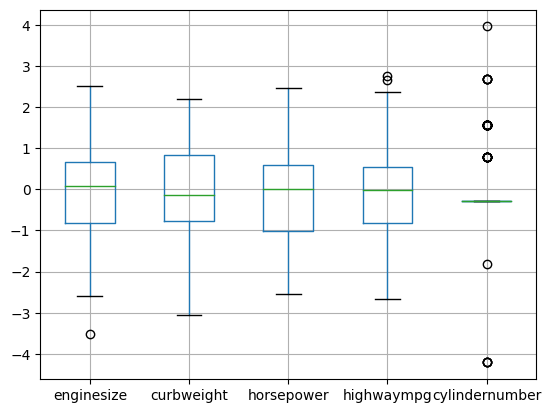

In [7]:
d_transf[['enginesize', 'curbweight', 'horsepower', 'highwaympg',
       'cylindernumber']].boxplot()

In [10]:
d_transf.to_csv('carros_final.csv', index = False)

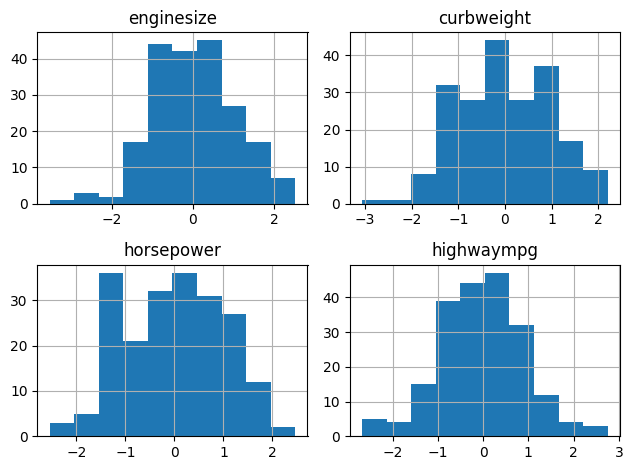

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2)
d_transf[['enginesize']].hist(ax=axes[0,0])
d_transf[['curbweight']].hist(ax=axes[0,1])
d_transf[['horsepower']].hist(ax=axes[1,0])
d_transf[['highwaympg']].hist(ax=axes[1,1])
fig.tight_layout()

## Conclusión

Se pudieron observar diversas variables y su importancia y afectación al describir *price*, sin embargo, después de análisis descriptivos y estadísitcos, se pudo reducir la dimensionalidad de nuestra base de datos a 6 variables que mejor describen a nuestra variable objetivo. Seleccionando estas como las variables que tenían mayor correlación con el precio pero no entre ellas (en caso de variables numéricas) y en caso de las variables categóricas, las que pudieran hacer una mejor separación del precio en sus características.

Esta reducción nos ayudará a mejorar la eficiencia de nuestro modelo y a reducir el ruido introducido en los datos, además, fue de gran ayuda ya que fue un acercamiento hacia la comprensión de las variables y su significado en el contexto.

Se espera que con este tratamiento y manejo de la base de datos se pueda entrenar un modelo que nos ayude a predecir el precio del automovil según sus caracterísiticas.